# Video Games: An exploratory data analysis

Video games have become one of the most influential industries in the world, hence it is interesting to understand more about this market.

In this data analysis project, we explore a catalogue of video games (16000 entries approximately) through **exploratory data analysis (EDA)**.  The libraries **pandas** (for data analysis) and **matplotlib** (for visualization) will guide our exploration. Our goal is more to have a better knowledge of the market rather than create a new model.

Our goal is to answer questions the following questions:

1) Do sales follow a "winner-takes-most" pattern, i.e. are there outliers?
2) Which games and publishers are the most successful?
3) Which are the most popular genres?


## Libraries and data cleaning

As a first step in our analysis we import the library that we need to use, to load our csv file and to clean our database by dropping the NA value.

In [74]:
import pandas as pd #upload libraries
import matplotlib.pyplot as plt

df = pd.read_csv("Video_Games.csv") #create dataframe and check
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,"2,006.00",Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00,51.00,8,322.00,Nintendo,E
1,Super Mario Bros.,NES,"1,985.00",Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00,73.00,8.3,709.00,Nintendo,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00,73.00,8,192.00,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


We check for missing values in the dataset using the Pandas library.

In [75]:
missing_counts = df.isna().sum().sort_values(ascending=False) #check presence of missing values
print("We have the following number of NA")
print(missing_counts)

We have the following number of NA
User_Count      9129
Critic_Score    8582
Critic_Count    8582
Rating          6769
User_Score      6704
                ... 
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Length: 16, dtype: int64


Now we clean the dataset by removing rows with missing values and dropping columns that are not useful for the sales analysis.

In [76]:
df_clean = df.drop(["Critic_Score", "Critic_Count", "User_Count", "User_Score", "Rating", "Developer"], axis=1) #drop not useful colums
df_clean = df_clean.dropna(subset=['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']) #drop NA
df_clean["Year_of_Release"] = df["Year_of_Release"].astype("Int64") 
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16717 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  Int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16663 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
dtypes: Int64(1), float64(5), object(4)
memory usage: 1.4+ MB


Next, we examine the mean, standard deviation, and whether a small number of titles account for a large share of total copies sold.

Statistically, such extreme observations are called *outliers*.

In [77]:
# Basic statistics for numeric columns
df_sales= df_clean.drop("Year_of_Release", axis=1)
df_sales.describe(include='number') #compute means, medians, standard deviations, minimum, maximum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,"16,717.00","16,717.00","16,717.00","16,717.00","16,717.00"
mean,0.26,0.15,0.08,0.05,0.53
std,0.81,0.50,0.31,0.19,1.55
min,0.00,0.00,0.00,0.00,0.01
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.03,0.47
max,41.36,28.96,10.22,10.57,82.53


Now we want to check which are the most successful games in this database.

In [78]:
# Top 10 games by Global Sales
top10 = df_clean.sort_values('Global_Sales', ascending=False).loc[:, ['Name','Platform','Year_of_Release','Genre','Global_Sales']].head(10)
top10

,Name,Platform,Year_of_Release,Genre,Global_Sales
0,Wii Sports,Wii,2006,Sports,82.53
1,Super Mario Bros.,NES,1985,Platform,40.24
2,Mario Kart Wii,Wii,2008,Racing,35.52
3,Wii Sports Resort,Wii,2009,Sports,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.37
5,Tetris,GB,1989,Puzzle,30.26
6,New Super Mario Bros.,DS,2006,Platform,29.80
7,Wii Play,Wii,2006,Misc,28.92
8,New Super Mario Bros. Wii,Wii,2009,Platform,28.32
9,Duck Hunt,NES,1984,Shooter,28.31


It is clear that **Nintendo franchises** dominates the market with title such as *Mario* and *Pokémon*.  We deduce that  **platform exclusivity** can boost sales.  

## Data visualization

In this section we visualize the insight that we have found in the previous steps. We will start observing the global sales of the videogames in our database.


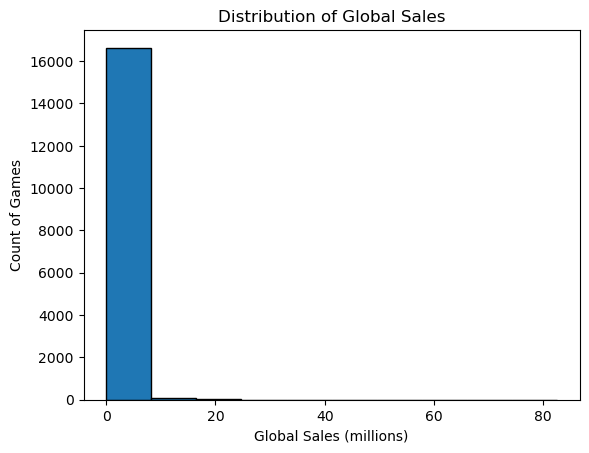

In [87]:
# Histogram to see the distribution of global sales
plt.figure()
df_clean['Global_Sales'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Count of Games')
plt.title('Distribution of Global Sales')
plt.show()

We confirm a large gap between a few best-selling video games and the long tail of lower-selling titles.

We focus now on the top 10 games, in order to undestand if the sales are comparable.

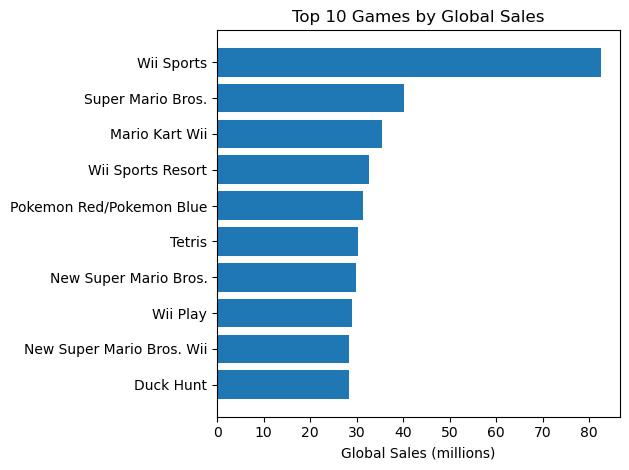

In [80]:
plt.figure()
top10_plot = df_clean.sort_values('Global_Sales', ascending=False).head(10)
plt.barh(top10_plot['Name'][::-1], top10_plot['Global_Sales'][::-1])
plt.xlabel('Global Sales (millions)')
plt.title('Top 10 Games by Global Sales')
plt.tight_layout()
plt.show()

Now we want to explore which platform is the most successful among the ones in our database.

We will notice that Nintendo have some of the most popular consoles, however the most popular one belongs to another company.

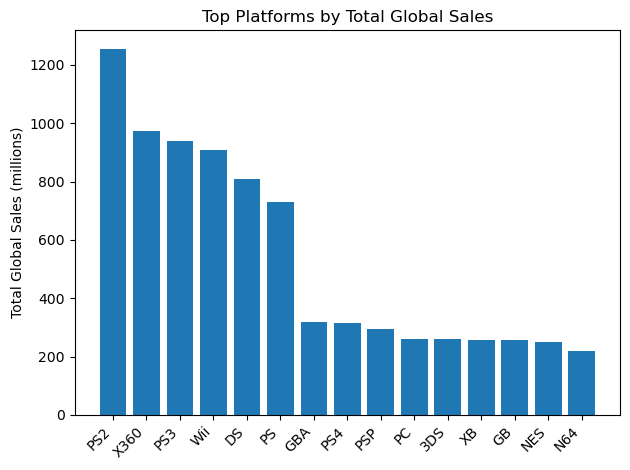

In [81]:
platform_sales = df_clean.groupby('Platform', as_index=False)['Global_Sales'].sum().sort_values('Global_Sales', ascending=False)
plt.figure()
plt.bar(platform_sales['Platform'][:15], platform_sales['Global_Sales'][:15])
plt.ylabel('Total Global Sales (millions)')
plt.title('Top Platforms by Total Global Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Platform analysis shows how sales concentrate on a few major consoles, in particular **Sony and Nintendo**, especially at the beginning of 2000s.

However the second best selling console was created by **Microsoft**.

We want now to visualize the distribution of sales by year.

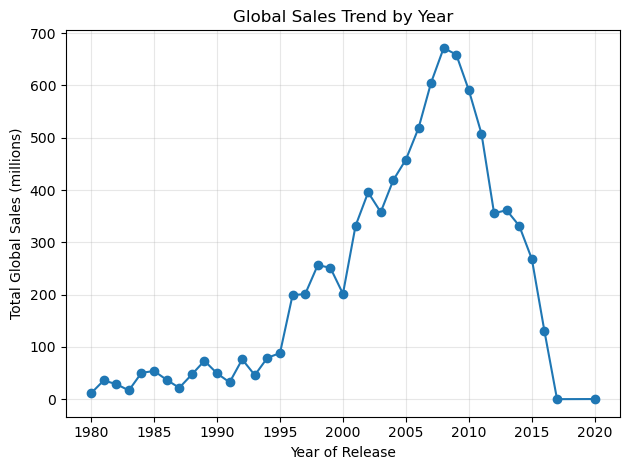

In [82]:
yearly = df_clean.dropna(subset=['Year_of_Release']).groupby('Year_of_Release', as_index=False)['Global_Sales'].sum().sort_values('Year_of_Release')
plt.figure()
plt.plot(yearly['Year_of_Release'], yearly['Global_Sales'], marker='o')
plt.xlabel('Year of Release')
plt.ylabel('Total Global Sales (millions)')
plt.title('Global Sales Trend by Year')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

It appears that the strongest period for console video-game sales was concentrated between 1996 and 2013.

We repeat a similar computation to understand which genre is the most popular in the catalogue. In this case we compute the mean 

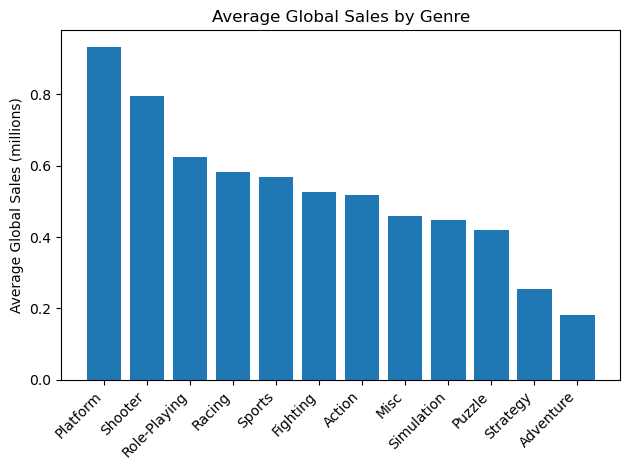

In [83]:
genre_avg = df_clean.dropna(subset=['Genre']).groupby('Genre', as_index=False)['Global_Sales'].mean().sort_values('Global_Sales', ascending=False)
plt.figure()
plt.bar(genre_avg['Genre'], genre_avg['Global_Sales'])
plt.ylabel('Average Global Sales (millions)')
plt.title('Average Global Sales by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Next, we compare regional markets to identify the largest.

In [84]:
# Compare total sales by region
region_totals = df_clean[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False)
region_totals

NA_Sales      4,400.84
EU_Sales      2,424.14
JP_Sales      1,297.40
Other_Sales     791.26
dtype: float64

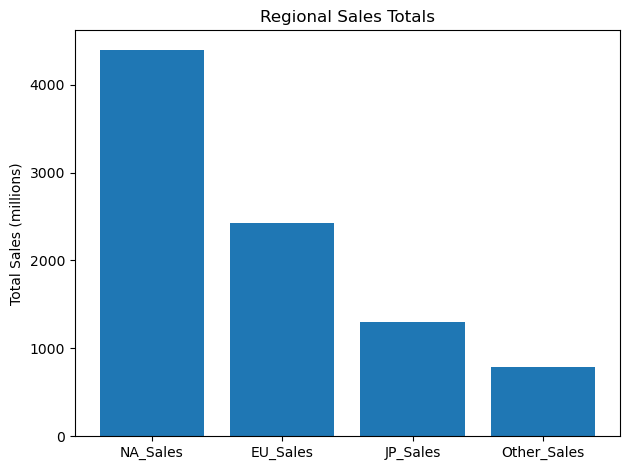

In [85]:
plt.figure()
plt.bar(region_totals.index, region_totals.values)
plt.ylabel('Total Sales (millions)')
plt.title('Regional Sales Totals')
plt.tight_layout()
plt.show()

## So what?

At the end of our analysis we may say that

- Only few games are best seller.
- Nintendo and Sony control the majority of the market.
- Certain years show higher total sales — perhaps due to console cycles or blockbuster releases.

From a go-to-market perspective, it may be advantageous to secure platform partnerships (e.g., with Nintendo or Sony) and to develop titles in high-demand genres (notably platformers and shooters) for their consoles.
